Dataset Info:
**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  


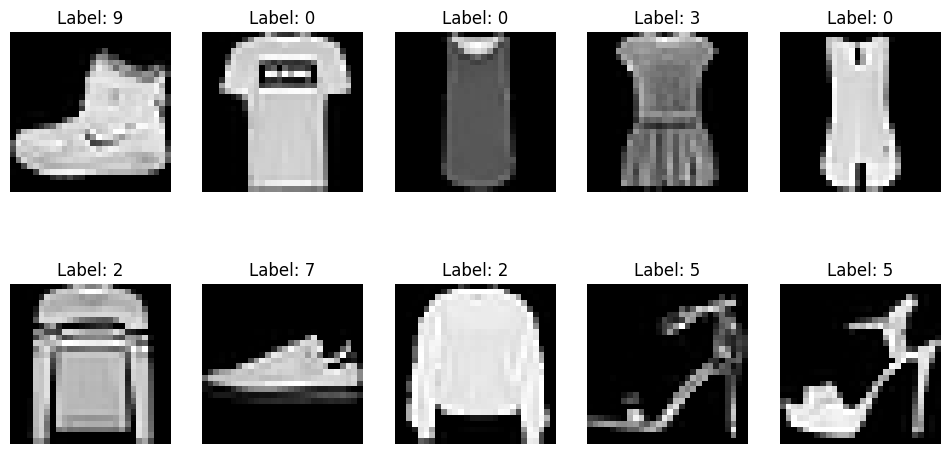

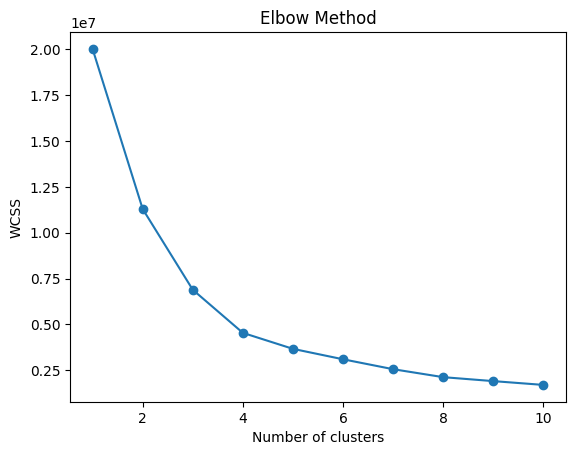

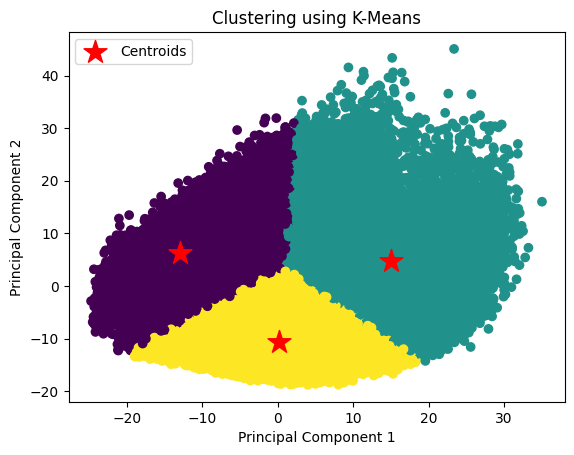

Silhouette Score: 0.43013808269823445


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Business Understanding:
# Fashion MNIST dataset merupakan kumpulan data gambar pakaian seperti sepatu, baju, dan tas.
# Dalam proyek ini, kita akan menggunakan dataset Fashion MNIST untuk melakukan clustering 
# untuk mengelompokkan gambar-gambar pakaian yang serupa secara visual.

# Data Understanding:
# Membaca dataset Fashion MNIST
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1, as_frame=False, parser='auto')

# Menampilkan informasi dataset
print("Dataset Info:")
print(fashion_mnist.DESCR)

# Menampilkan contoh gambar dari dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(fashion_mnist.data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {fashion_mnist.target[i]}")
    ax.axis('off')
plt.show()

# Data Preparation:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fashion_mnist.data)

# Modelling Clustering menggunakan K-Means:
# Menggunakan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Menentukan jumlah cluster menggunakan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Menampilkan elbow plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Berdasarkan elbow plot, pilih jumlah cluster yang sesuai
n_clusters = 3

# Melakukan clustering menggunakan K-Means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Visualisasi hasil clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Clustering using K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Evaluation:
# Menggunakan silhouette score untuk evaluasi
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette_avg}")
